In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [125]:
data=pd.read_csv('titanic.csv',delimiter = '\t')

In [126]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [128]:
data.shape

(156, 12)

In [129]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [130]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

Age and Cabin column have null values

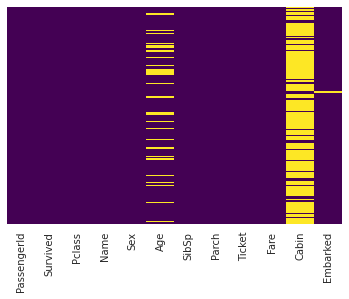

In [131]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

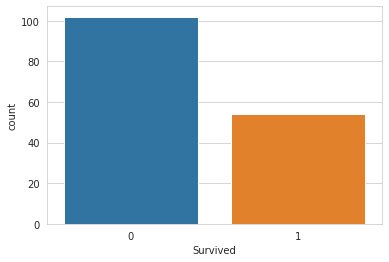

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

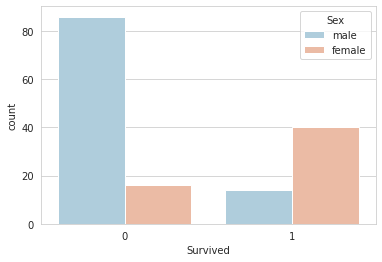

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,hue='Sex',palette='RdBu_r')

In [134]:
data.groupby(['Survived'])['Sex'].value_counts()

Survived  Sex   
0         male      86
          female    16
1         female    40
          male      14
Name: Sex, dtype: int64

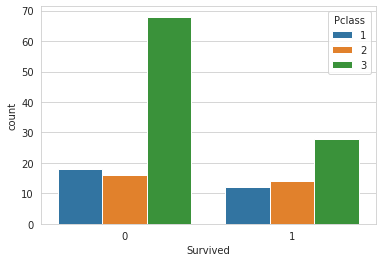

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,hue='Pclass')
plt.show()

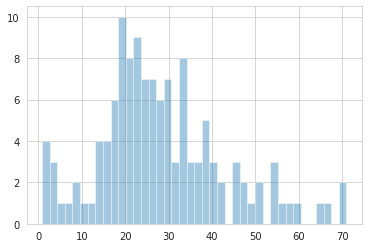

In [136]:
data['Age'].hist(bins=40,alpha=0.4)

Data Cleaning

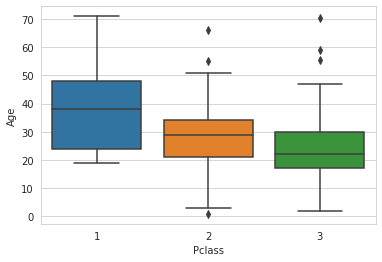

In [137]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [138]:
# treating Age NAN Values basied on PClass
def impute_age(cols):
    Age2 = cols[0]
    Pclass2 = cols[1]
    
    if pd.isnull(Age2):

        if Pclass2 == 1:
            return data[data['Pclass']==1]['Age'].median()

        elif Pclass2 == 2:
            return data[data['Pclass']==2]['Age'].median()

        else:
            return data[data['Pclass']==3]['Age'].median()

    else:
        return Age2

In [139]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [140]:
# Treat NAN values for EMBARKD
data.Embarked.isna().sum() # 1 nan 
data.Embarked.mode()[0] # finding the most common occuring value from the column
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)
data.Embarked.isna().sum() # 0 nan

0

In [141]:
data.drop('Cabin',axis=1,inplace=True)

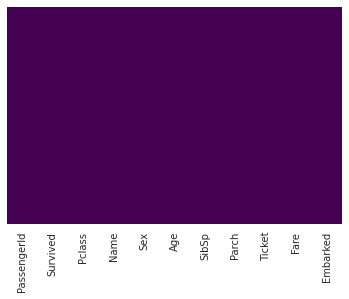

In [142]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          156 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Embarked     156 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 13.5+ KB


Converting Categorical Features

In [144]:
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'],drop_first=True)

In [145]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [146]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived','Name','Parch','Ticket','PassengerId', 'SibSp', 'Pclass'],axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state = 42)

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [149]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [150]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

In [151]:
accuracy_score(y_test, predictions)

0.7446808510638298

In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.68      0.68      0.68        19

    accuracy                           0.74        47
   macro avg       0.73      0.73      0.73        47
weighted avg       0.74      0.74      0.74        47



Using Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
forest = RandomForestClassifier()

In [155]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
y_predict = forest.predict(X_test)

In [157]:
accuracy_score(y_test, y_predict)

0.6595744680851063

In [158]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.58      0.58      0.58        19

    accuracy                           0.66        47
   macro avg       0.65      0.65      0.65        47
weighted avg       0.66      0.66      0.66        47



Using SVC

In [159]:
from sklearn.svm import SVC

In [160]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [161]:
accuracy_score(y_test, y_pred)

0.5957446808510638

Using DecisionTree

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
# view accuracy score
accuracy_score(y_test, y_pred)

0.6382978723404256

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        28
           1       0.56      0.47      0.51        19

    accuracy                           0.64        47
   macro avg       0.62      0.61      0.61        47
weighted avg       0.63      0.64      0.63        47



Using XGBoost

In [165]:
import xgboost as xgb

In [166]:

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7659574468085106

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        28
           1       0.83      0.53      0.65        19

    accuracy                           0.77        47
   macro avg       0.79      0.73      0.74        47
weighted avg       0.78      0.77      0.75        47

